In [13]:
import numpy as np
import tensorflow as tf
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from google.colab import drive
import glob
import os
from keras.callbacks import EarlyStopping


In [14]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
dataset_dir = '/content/drive/MyDrive/Dataset_IC01/Gigi Tampak Bawah'

In [16]:
class_labels = ['Bengkak Gusi', 'Bukan Gambar Gigi', 'Gigi Sehat','Gigi Berlubang','Plak Gigi']

In [17]:
import os
files = os.listdir(dataset_dir)
print(files)

['Gigi Sehat', 'Plak Gigi', 'Gigi Berlubang', 'Bengkak Gusi', 'Bukan Gambar Gigi']


In [18]:
# Initialize an empty list to store the image files
image_files = []

# Iterate over the subdirectories
for subdir in os.listdir(dataset_dir):
    subdir_path = os.path.join(dataset_dir, subdir)
    for file in os.listdir(subdir_path):
        if file.endswith(('.jpg', '.jpeg', '.png')):
            image_files.append(os.path.join(subdir_path, file))

# Split the image files into training and testing sets
train_files, test_files = train_test_split(image_files, test_size=0.2, random_state=42)

In [19]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    dataset_dir,
    target_size=(224, 224),
    batch_size=16,
    class_mode='categorical',
    classes=class_labels
)

test_generator = test_datagen.flow_from_directory(
    dataset_dir,
    target_size=(224, 224),
    batch_size=16,
    class_mode='categorical',
    classes=class_labels
)

Found 1252 images belonging to 5 classes.
Found 1252 images belonging to 5 classes.


In [20]:
# Define the CNN model architecture
model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(128, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(5, activation='softmax')
])


In [21]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 111, 111, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 26, 26, 128)      

In [22]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])



In [23]:
# Membuat EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, min_delta=0.01)

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // 32,
    epochs=100,  # Anda bisa mengatur jumlah epoch sesuai kebutuhan
    validation_data=test_generator,
    validation_steps=test_generator.samples // 32,
    callbacks=[early_stopping]
)

Epoch 1/100
39/39 [==============================] - 93s 2s/step - loss: 1.4048 - accuracy: 0.4444 - val_loss: 1.0684 - val_accuracy: 0.5785
Epoch 2/100
39/39 [==============================] - 90s 2s/step - loss: 0.9836 - accuracy: 0.6095 - val_loss: 0.8529 - val_accuracy: 0.6442
Epoch 3/100
39/39 [==============================] - 90s 2s/step - loss: 0.9084 - accuracy: 0.6426 - val_loss: 0.7390 - val_accuracy: 0.7179
Epoch 4/100
39/39 [==============================] - 86s 2s/step - loss: 0.7379 - accuracy: 0.7124 - val_loss: 0.6575 - val_accuracy: 0.7564
Epoch 5/100
39/39 [==============================] - 91s 2s/step - loss: 0.5722 - accuracy: 0.7859 - val_loss: 0.4373 - val_accuracy: 0.8285
Epoch 6/100
39/39 [==============================] - 93s 2s/step - loss: 0.4986 - accuracy: 0.8253 - val_loss: 0.3653 - val_accuracy: 0.8846
Epoch 7/100
39/39 [==============================] - 116s 3s/step - loss: 0.4579 - accuracy: 0.8381 - val_loss: 0.3295 - val_accuracy: 0.8766
Epoch 8/100


In [24]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_generator)
print(f'Test accuracy: {test_acc:.2f}')

79/79 [==============================] - 41s 520ms/step - loss: 0.0090 - accuracy: 0.9976
Test accuracy: 1.00


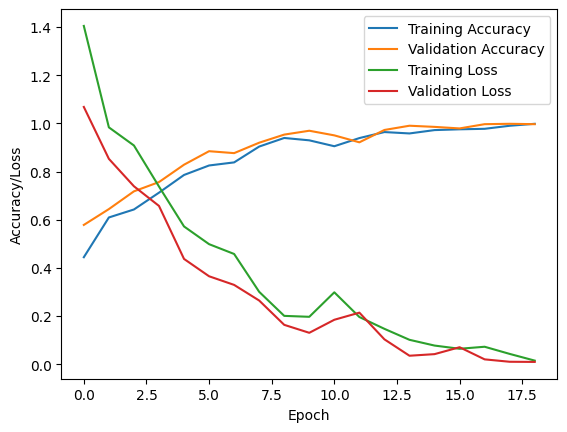

In [25]:
import matplotlib.pyplot as plt

# Plot the training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')

plt.xlabel('Epoch')
plt.ylabel('Accuracy/Loss')
plt.legend()
plt.show()

In [26]:
# Save the model
model.save('tampak_bawah.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [34]:
import numpy as np
from PIL import Image

In [35]:
test_image= '/content/gigi1.jpg'

In [36]:
img = Image.open(test_image)
img = img.resize((224, 224))  # Resize the image to 224x224
img = np.array(img) / 255.0  # Normalize the image pixels to [0, 1]

In [37]:
# Add a batch dimension to the image
img = np.expand_dims(img, axis=0)

# Make predictions on the image
predictions = model.predict(img)

# Get the class probabilities
class_probabilities = predictions[0]

1/1 [==============================] - 0s 140ms/step


In [38]:
predictions

array([[0.0163745 , 0.40173563, 0.19206195, 0.38423207, 0.00559584]],
      dtype=float32)

In [40]:
# Get the class with the highest probability
class_index = np.argmax(class_probabilities)
class_name = ['Bengkak Gusi', 'Bukan Gambar Gigi', 'Gigi Sehat','Gigi Berlubang','Plak Gigi'][class_index]

print(f'Predicted class: {class_name}')
print(f'Class probability: {class_probabilities[class_index]:.2f}')

Predicted class: Plak Gigi
Class probability: 0.40


In [41]:
class_probabilities

array([0.0163745 , 0.40173563, 0.19206195, 0.38423207, 0.00559584],
      dtype=float32)